In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

path=r'D:/Study/Python/openCV/College/res/'

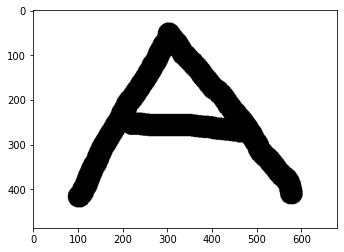

In [37]:
img= cv2.imread(path+'A.png',0)
height,width=img.shape
plt.imshow(img,'gray')

In [38]:
lenna=cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_CONSTANT,value=0)
arr=np.asarray(lenna)

In [39]:
kernel=np.array([
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]])

sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
blur=np.zeros(img.shape,dtype='uint8')
sobel=np.zeros(img.shape)

Text(0.5, 1.0, 'Blur Image')

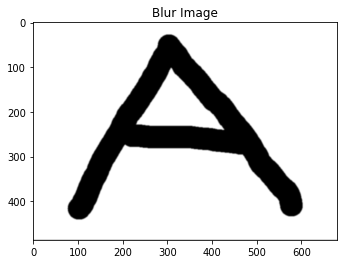

In [40]:
for i in range(height):
    for j in range(width):
        blur[i,j]=int(np.sum(arr[i:i+5 , j:j+5]*kernel)/np.sum(kernel))
plt.imshow(blur,'gray')
plt.title("Blur Image")

In [41]:
sb_i=cv2.copyMakeBorder(blur,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
sx=np.zeros(img.shape)
sy=np.zeros(img.shape)

for i in range(height):
    for j in range(width):
        sx[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_x)
        sy[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_y)
        sobel[i,j]=round(math.sqrt(sy[i,j]*sy[i,j] + sx[i,j]*sx[i,j]))
for i in range(height):
    for j in range(width):
        sobel[i,j]=sobel[i,j] / sobel.max() *255

theta = np.arctan2(sy, sx)

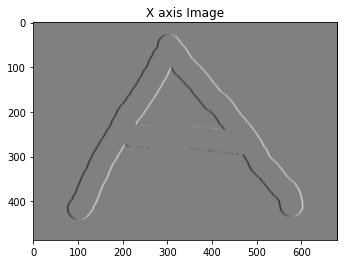

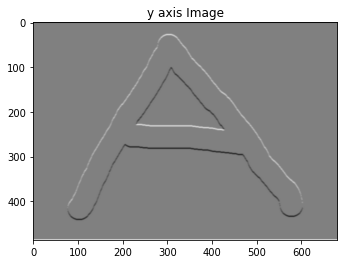

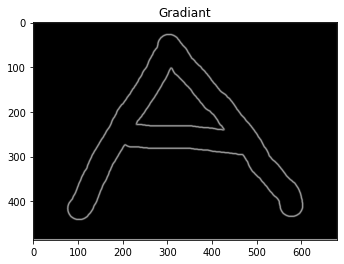

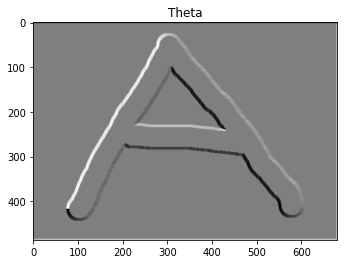

In [42]:
plt.imshow(sx,'gray')
plt.title("X axis Image")
plt.show()
plt.imshow(sy,'gray')
plt.title("y axis Image")
plt.show()
plt.imshow(sobel,'gray')
plt.title("Gradiant")
plt.show()
plt.imshow(theta,'gray')
plt.title("Theta")
plt.show()

In [43]:
print(theta)
print(sobel)

[[-0.78539816 -1.35673564 -1.5314967  ... -1.61009595 -1.78485701
  -2.35619449]
 [-0.21406068 -0.78539816 -1.39178105 ... -1.7498116  -2.35619449
  -2.92753197]
 [-0.03929963 -0.17901528 -0.78539816 ... -2.35619449 -2.96257738
  -3.10229303]
 ...
 [ 0.03929963  0.17901528  0.78539816 ...  2.35619449  2.96257738
   3.10229303]
 [ 0.21406068  0.78539816  1.39178105 ...  1.7498116   2.35619449
   2.92753197]
 [ 0.78539816  1.35673564  1.5314967  ...  1.61009595  1.78485701
   2.35619449]]
[[208.32112971 232.32740586 251.26569038 ... 251.26569038 232.32740586
  208.32112971]
 [232.32740586 107.49476987  85.35564854 ...  85.35564854 107.49476987
  232.32740586]
 [251.26569038  85.35564854  23.73953975 ...  23.73953975  85.35564854
  251.26569038]
 ...
 [251.26569038  85.35564854  23.73953975 ...  23.73953975  85.35564854
  251.26569038]
 [232.32740586 107.49476987  85.35564854 ...  85.35564854 107.49476987
  232.32740586]
 [208.32112971 232.32740586 251.26569038 ... 255.         255.
  255

In [44]:
angle = theta * 180. / np.pi
angle[angle < 0] += 180
print(angle)

[[135.         102.26477373  92.25170281 ...  87.74829719  77.73522627
   45.        ]
 [167.73522627 135.         100.25681984 ...  79.74318016  45.
   12.26477373]
 [177.74829719 169.74318016 135.         ...  45.          10.25681984
    2.25170281]
 ...
 [  2.25170281  10.25681984  45.         ... 135.         169.74318016
  177.74829719]
 [ 12.26477373  45.          79.74318016 ... 100.25681984 135.
  167.73522627]
 [ 45.          77.73522627  87.74829719 ...  92.25170281 102.26477373
  135.        ]]


In [45]:
n_m_s=np.zeros(img.shape, dtype=np.int32)
for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
        try:
            q = 255
            r = 255

            #angle 0
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = sobel[i, j+1]
                r = sobel[i, j-1]
            #angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                q = sobel[i+1, j-1]
                r = sobel[i-1, j+1]
            #angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                q = sobel[i+1, j]
                r = sobel[i-1, j]
            #angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                q = sobel[i-1, j-1]
                r = sobel[i+1, j+1]
            if (sobel[i,j] >= q) and (sobel[i,j] >= r):
                n_m_s[i,j] = sobel[i,j]
            else:
                n_m_s[i,j] = 0
        except IndexError as e:
            pass

Text(0.5, 1.0, 'Non Max Supression')

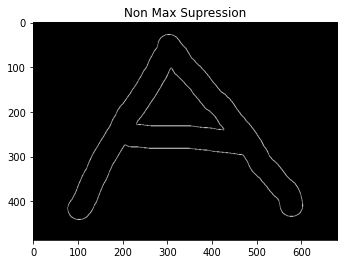

In [46]:
plt.imshow(n_m_s,'gray')
plt.title("Non Max Supression")

In [47]:
weak = np.int32(25)
strong = np.int32(255)
highThreshold = n_m_s.max() * 0.09
lowThreshold = highThreshold * 0.05

dub_thres=np.zeros(img.shape,dtype=np.int32)

strong_i, strong_j = np.where(n_m_s >= highThreshold)
zeros_i, zeros_j = np.where(n_m_s < lowThreshold)

weak_i, weak_j = np.where((n_m_s <= highThreshold) & (n_m_s >= lowThreshold))

dub_thres[strong_i, strong_j] = strong
dub_thres[weak_i, weak_j] = weak

Text(0.5, 1.0, 'Double Threshold')

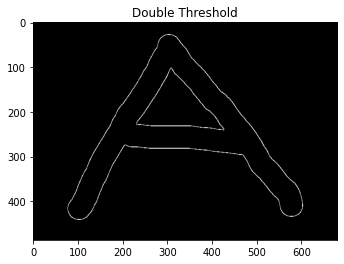

In [48]:
plt.imshow(dub_thres,'gray')
plt.title("Double Threshold")

In [49]:
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        if (dub_thres[i,j] == weak):
            try:

                if ((dub_thres[i+1, j-1] == strong) or (dub_thres[i+1, j] == strong) or 
                (dub_thres[i+1, j+1]== strong) or (dub_thres[i, j-1] == strong) or 
                (dub_thres[i, j+1] == strong) or (dub_thres[i-1, j-1] == strong)or 
                (dub_thres[i-1, j] == strong) or (dub_thres[i-1, j+1] == strong)):
                    dub_thres[i, j] = strong
                else:
                    dub_thres[i, j] = 0
            except IndexError as e:
                pass

Text(0.5, 1.0, 'Final Image of Canny Edge Detection')

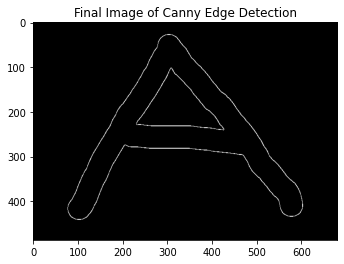

In [50]:
plt.imshow(dub_thres,'gray')
plt.title("Final Image of Canny Edge Detection")